## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [15]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [22]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
#dont again assign this value to that column

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_22236\1708896212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Independent and dependent varaible

In [25]:
x = df.iloc[:,1:3]
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [26]:
y = df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train_test_split

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape

(712, 2)

In [29]:
x_test.shape

(179, 2)

## Visualisation

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_22236\718055844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


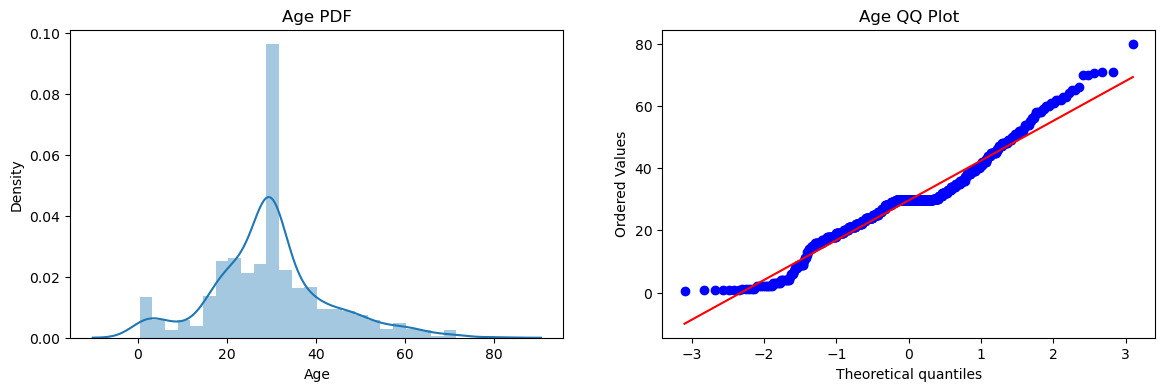

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_22236\3313795166.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


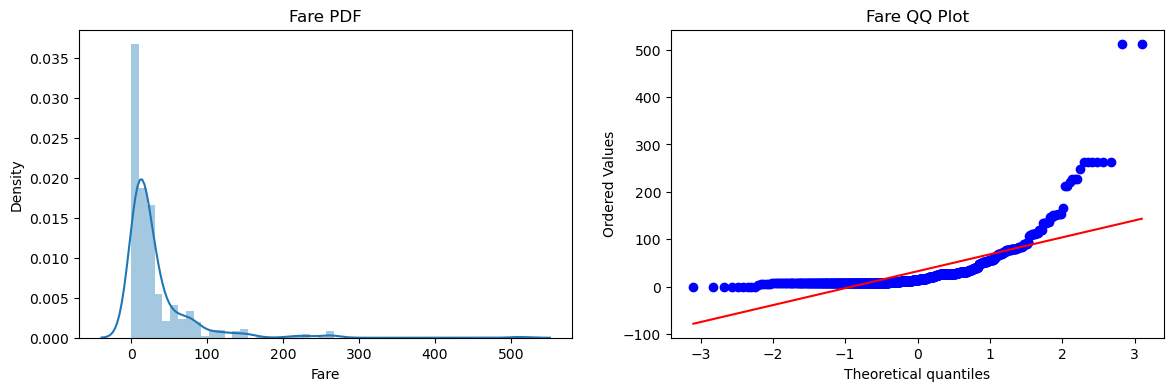

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

## Model building without transformation

In [82]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [83]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
    
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6536312849162011
Accuracy DT 0.6703910614525139


## With transformation 

In [84]:
trf = FunctionTransformer(func=np.log1p)
#np.log bhi use kar sakte the but agar data me 0 aaya to gadbad hojayegi isliye np.log1p. Ye us number me 1 add karke fir uska log leta hain.

In [85]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [86]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
    
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6871508379888268
Accuracy DT 0.664804469273743


## cross_val_score

In [87]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=5)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=5)))

LR 0.6780114242671521
DT 0.6509635302240915


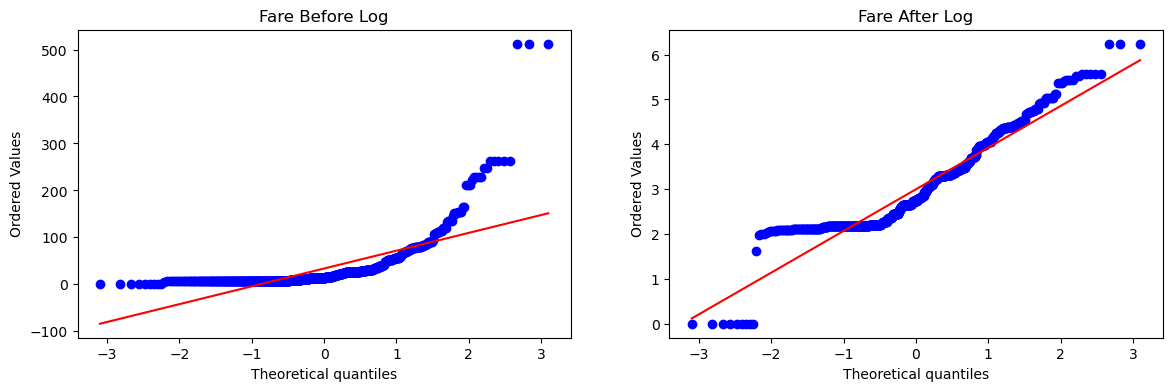

In [88]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

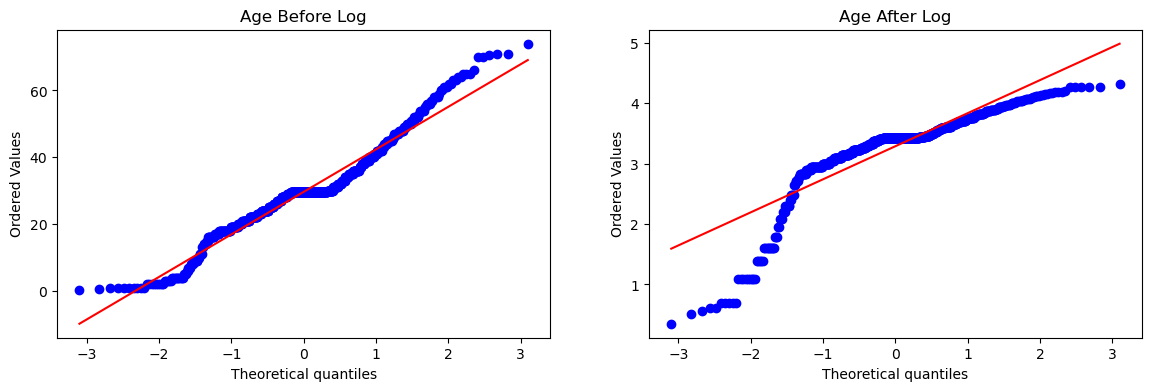

In [89]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()
#Many times it will worse model.

## Applying onlt on Fare 

In [90]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [91]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.664804469273743
Accuracy DT 0.6703910614525139


## cross_val_score

In [92]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6655680399500624


## All Transformations

In [93]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    x_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


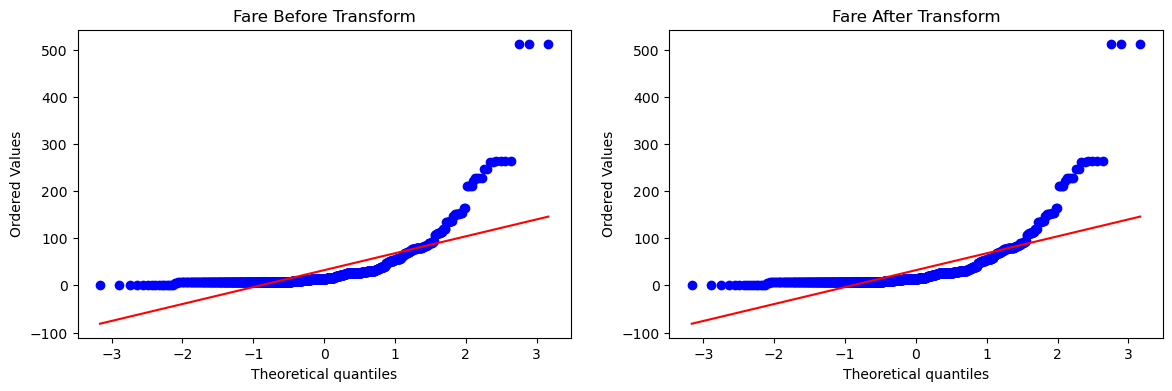

In [95]:
apply_transform(lambda x : x)

Accuracy 0.6431335830212235


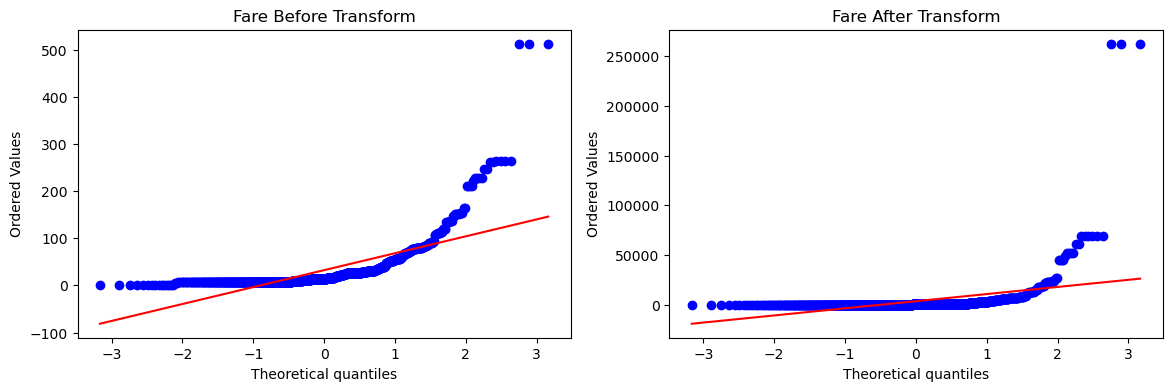

In [96]:
apply_transform(lambda x : x**2)

Accuracy 0.6262796504369538


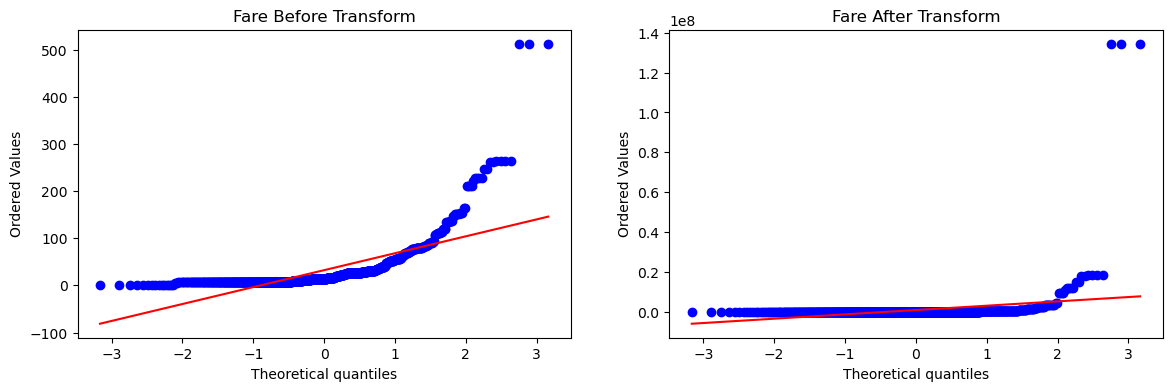

In [97]:
apply_transform(lambda x : x**3)

Accuracy 0.61729088639201


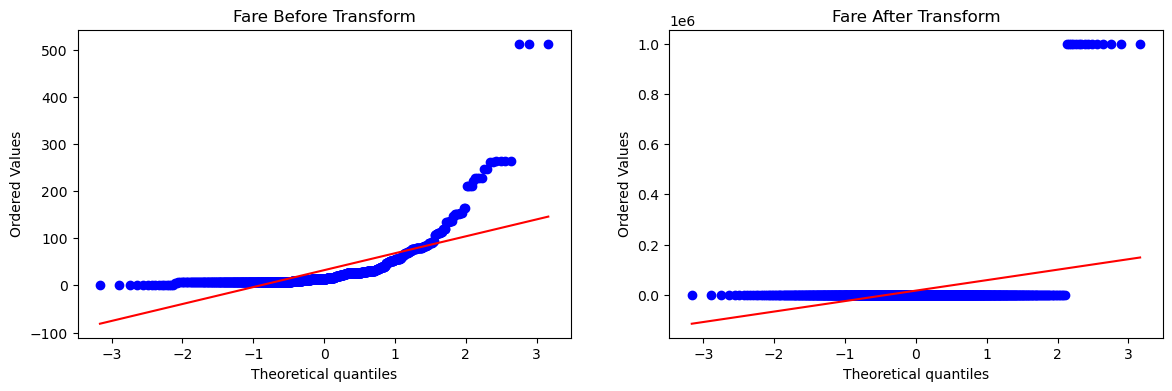

In [98]:
apply_transform(lambda x : 1/(x+0.000001))